In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
datafile = 'data/abalone.data'

# column names, from 'abalone.names'
cols = ['sex','length','diameter','height','weight_whole','weight_shucked','weight_viscera','weight_shell','rings']

In [8]:
data = pd.read_csv(datafile)
data.columns=cols
print(data.shape)
data.head()

(4176, 9)


,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
sex               4176 non-null object
length            4176 non-null float64
diameter          4176 non-null float64
height            4176 non-null float64
weight_whole      4176 non-null float64
weight_shucked    4176 non-null float64
weight_viscera    4176 non-null float64
weight_shell      4176 non-null float64
rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
data.describe()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


/Users/drewthayer/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/drewthayer/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/drewthayer/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/drewthayer/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


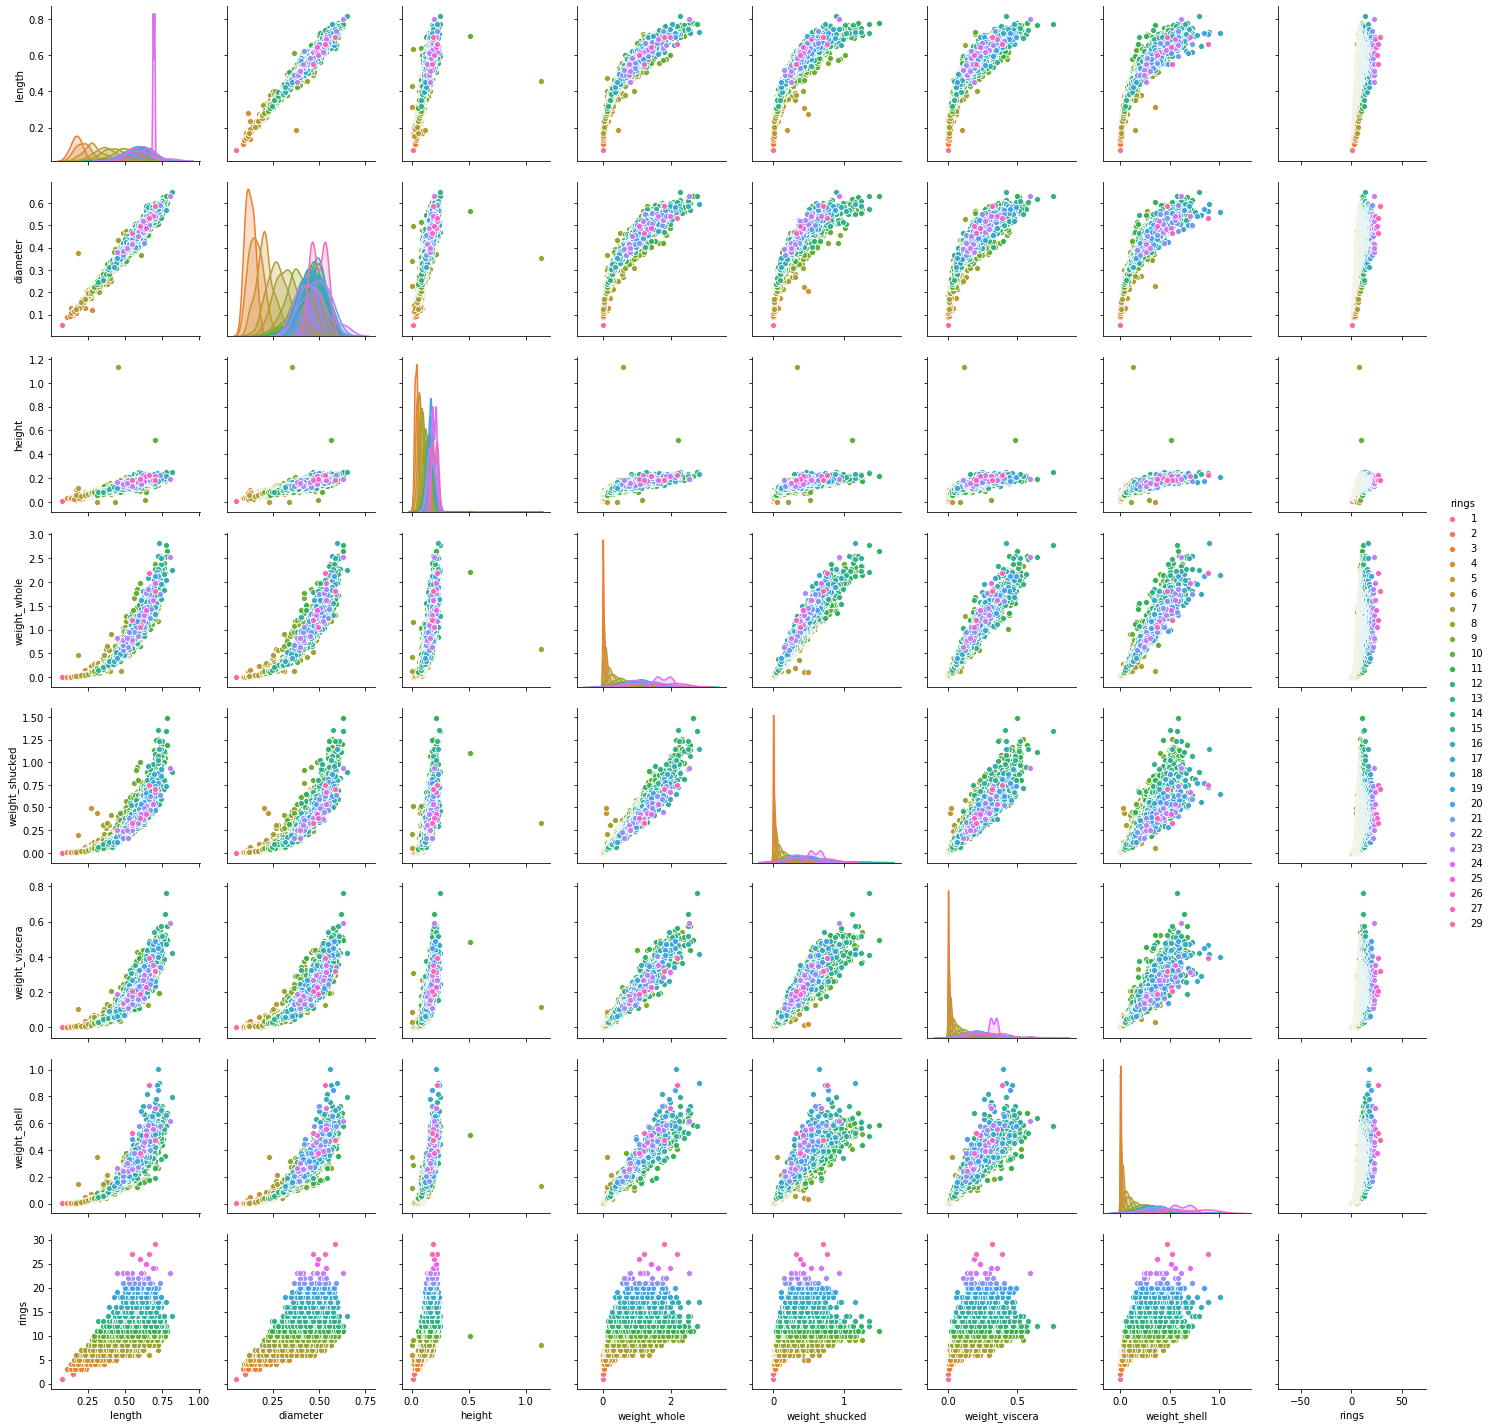

In [11]:
import seaborn as sns
sns.pairplot(data, hue='rings')

## clean the data: encode string variables

In [20]:
unique = data['sex'].unique().tolist()

mapper = dict(zip(unique, [0,1,2]))

# update 
data['sex_int'] = data.sex.apply(lambda x: mapper[x])
data.head()

,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,sex_int
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,2


In [12]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'weight_whole', 'weight_shucked',
       'weight_viscera', 'weight_shell', 'rings'],
      dtype='object')

In [33]:
feats = ['sex_int', 'length', 'diameter', 'height', 'weight_whole', 'weight_shucked',
       'weight_viscera', 'weight_shell']
X = data[feats]
y = data['rings']

In [22]:
from sklearn.model_selection import train_test_split

test_pcnt = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pcnt)

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
acc_score = logistic_model.score(X_test, y_test)
print(f'accuracy = {round(acc_score, 3)}')

/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy = 0.278


In [30]:
#proba = logistic_model.predict_proba(X_test)
#plt.plot(proba)

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
r2 = linear_model.score(X_test, y_test)
preds = linear_model.predict(X_test)
r2

0.5257682509711428

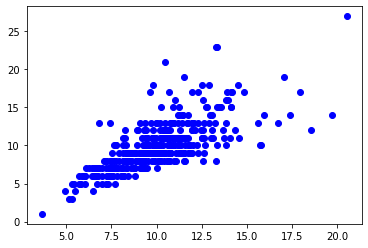

In [27]:
plt.plot(preds, y_test, 'ob')

## look at intercept and coefficients

In [32]:
linear_model.intercept_

3.67901832564064

In [35]:
coefs = linear_model.coef_

In [36]:
[x for x in zip(feats, coefs)]

[('sex_int', -0.3640054740224205),
 ('length', -1.006057832460678),
 ('diameter', 12.336175795530314),
 ('height', 11.357931802480831),
 ('weight_whole', 9.412233955275882),
 ('weight_shucked', -20.27384243651072),
 ('weight_viscera', -10.944638364257942),
 ('weight_shell', 8.30894764632942)]

Text(0.5, 0, "['sex_int', 'length', 'diameter', 'height', 'weight_whole', 'weight_shucked', 'weight_viscera', 'weight_shell']")

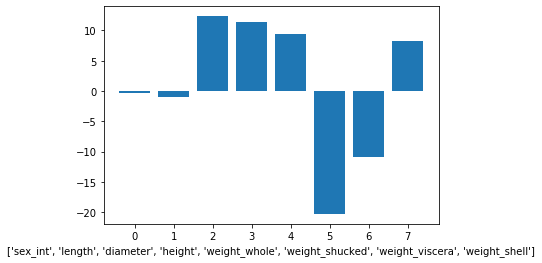

In [42]:
plt.bar(range(len(coefs)), coefs)
plt.xlabel(feats)